# Яндекс Книги

Проверка гипотезы и составление аналитической записки


### Цель проекта


Cервис Яндекс Книги предоставляет услугу чтения и прослушивания контента. Выдвинута гипотеза о том, что пользователи, которые приносят больший LTV, являются более лояльными, а значит, проводят в среднем больше времени за чтением и прослушиванием книг в приложении. 
Для анализа предоставлены данные о пользователях Москвы и Санкт-Петербурга, о платформах, времени, длительности сессий и типах контента.  Данные представлены за период с 1 сентября по 11 декабря 2024 года. 

**Цель проекта:** При расчете метрик двух групп средний LTV в группе Санкт-Петербурга оказался выше.  Следовательно, нужно проверить гипотезу о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении по сравнению с пользователями из Москвы.

### Содержание проекта

1. Загрузка данных и знакомство с ними.
   - 1.1. Знакомство с данными, выявление пропусков и дубликатов
   - 1.2. Распределение пользователей в Москве и Санкт-Петербурге
   - 1.3. Распределение времени продолжительности чтения и прослушивания в группах
2. Проверка гипотезы
3. Аналитическая записка

---

## 1. Загрузка данных и знакомство с ними

### 1.1. Знакомство с данными, выявление пропусков и дубликатов


Импортируем необходимые библиотеки, создаем датафрейм `df_knigi` и знакомимся с его содержанием 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import ttest_ind

In [2]:
df_knigi = pd.read_csv('yandex_knigi_data.csv')

In [3]:
df_knigi.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


- Удалим ненужный столбец из датафрейма
- Проверим наличие пропусков в данных
- Проверим наличие дубликатов в идентификаторах данных и удалим дубликаты

In [4]:
df_knigi.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df_knigi.isna().sum()

city     0
puid     0
hours    0
dtype: int64

In [6]:
df_knigi['puid'].duplicated().sum()

244

In [7]:
df_knigi.drop_duplicates(subset='puid', keep='first', inplace=True)
df_knigi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8540 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8540 non-null   object 
 1   puid    8540 non-null   int64  
 2   hours   8540 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 266.9+ KB


- Пропуски в датафрейме отсутствуют, 244 дубликата удалены.

---

### 1.2. Распределение пользователей в Москве и Санкт-Петербурге

- Посчитаем количество уникальных пользователей в Москве и Санкт-Петербурге
- Рассчитаем процентную разницу в количестве пользователей в группах df_moscow и df_spb
- Построим круговую диаграмму с распределением пользователей

In [8]:
users = df_knigi.groupby('city').agg({'puid': 'nunique'}).reset_index()
users

,city,puid
0,Москва,6234
1,Санкт-Петербург,2306


In [9]:
moscow = users[users['city'] == 'Москва']
spb = users[users['city'] == 'Санкт-Петербург']
display(moscow, spb)
perc_dif = 100*(abs(moscow['puid'].values[0] - spb['puid'].values[0])/moscow['puid'].values[0])
perc_dif

,city,puid
0,Москва,6234


,city,puid
1,Санкт-Петербург,2306


63.0093038177735

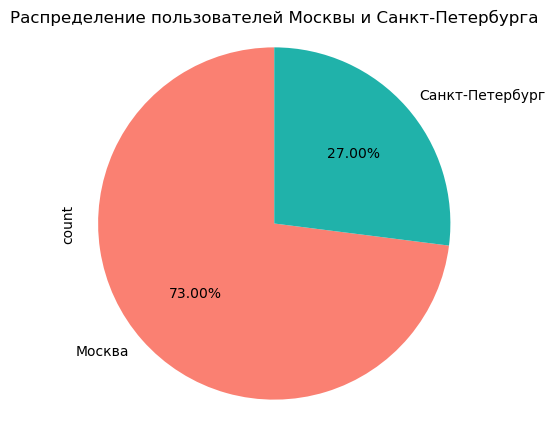

In [10]:
df_knigi['city'].value_counts().plot(
    kind='pie',
    figsize = (5,5),
    startangle=90,
    legend=False,
    autopct='%1.2f%%',
    labels=['Москва', 'Санкт-Петербург'],
    colors=['salmon', 'lightseagreen']
)

plt.title('Распределение пользователей Москвы и Санкт-Петербурга')
plt.axis('equal')
plt.show()

---

### 1.3. Распределение времени продолжительности чтения и прослушивания в группах

- Создадим 2 таблицы с пользователями Москвы и Санкт-Петербурга и проверим распределение продолжительности чтения и прослушивания в группах с использованием метода .describe()
- Построим диаграмму распределения часов чтения в Москве и Санкт-Петербурге
- Построим диаграмму размаха с помощью метода boxplot()

In [11]:
df_moscow = df_knigi[df_knigi['city'] == 'Москва']
df_spb = df_knigi[df_knigi['city'] == 'Санкт-Петербург']
print(f'Статистика данных о продолжительности чтения и прослушивания в Москве')
display(df_moscow['hours'].describe())
print(f'Статистика данных о продолжительности чтения и прослушивания в Санкт-Петербурге')
display(df_spb['hours'].describe())

Статистика данных о продолжительности чтения и прослушивания в Москве


count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64

Статистика данных о продолжительности чтения и прослушивания в Санкт-Петербурге


count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64

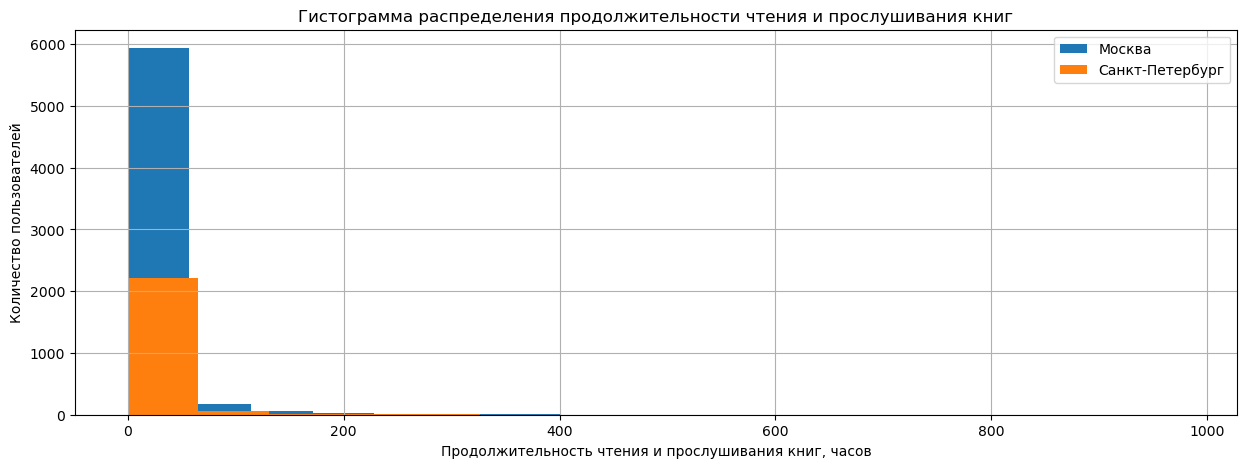

In [12]:
plt.figure(figsize=(15, 5))
df_moscow['hours'].hist(bins=15, label='Москва')
df_spb['hours'].hist(bins=15, label='Санкт-Петербург')

plt.xlabel('Продолжительность чтения и прослушивания книг, часов')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения продолжительности чтения и прослушивания книг')
plt.legend()
plt.show()

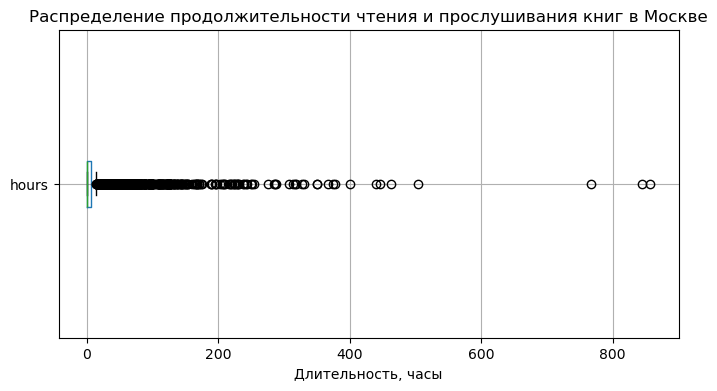

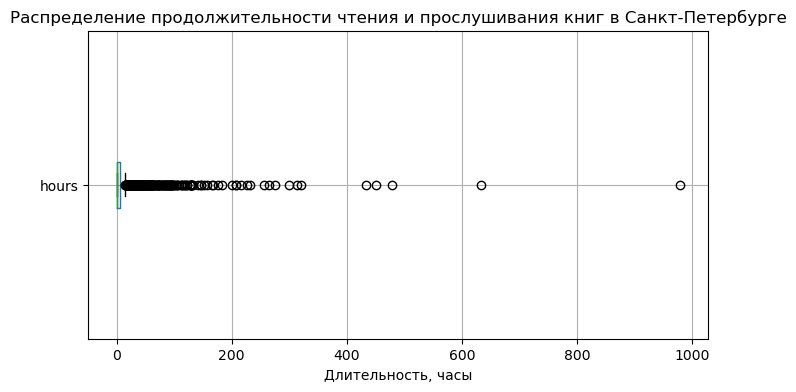

In [13]:
boxplot = df_moscow.boxplot(
    column='hours',
    vert=False,
    grid=True,
    figsize=(8, 4)
)
boxplot.set_title('Распределение продолжительности чтения и прослушивания книг в Москве')
boxplot.set_xlabel('Длительность, часы')
plt.show()

boxplot = df_spb.boxplot(
    column='hours',
    vert=False,
    grid=True,
    figsize=(8, 4)
)
boxplot.set_title('Распределение продолжительности чтения и прослушивания книг в Санкт-Петербурге')
boxplot.set_xlabel('Длительность, часы')
plt.show()

- Гистограмма распределения и диаграммы размаха продолжительности часов чтения показывают, что есть выбросы значений. Однако в условии задачи не указан срок продолжительности данных наблюдений, поэтому сложно оценить адекватность значений. Можно предположить, что срок продолжительности наблюдений был достаточно долгим для того, чтобы отдельные пользователи могли провести столько времени за прочтением книг. Поэтому выбросы удалять не будем.
- Так как распределение продолжительности часов чтения не является нормальным, используем для проверки гипотезы t-тест Уэлча.

Посчитаем выборочное среднее и стандартное отклонение часов чтения и прослушивания книг в Москве и Санкт-Петербурге

In [14]:
mu_moscow = df_moscow['hours'].mean()
mu_spb = df_spb['hours'].mean()
sigma_moscow = df_moscow['hours'].std()
sigma_spb = df_spb['hours'].std()

print(f'Среднее количество часов в Москве {round(mu_moscow, 1)}, стандартное отклонение {round(sigma_moscow, 1)}.')
print(f'Среднее количество часов в Санкт-Петербурге {round(mu_spb, 1)}, стандартное отклонение {round(sigma_spb, 1)}.')

Среднее количество часов в Москве 10.9, стандартное отклонение 36.9.
Среднее количество часов в Санкт-Петербурге 11.3, стандартное отклонение 39.8.


---

## 2. Проверка гипотезы в Python


Сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза H₀:** Средняя активность пользователей в часах за чтением и прослушиванием книг в приложении в Санкт-Петербурге не больше, чем в Москве.

- **Альтернативная гипотеза H₁:** Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Для проверки гипотезы используем t-теста Уэлча

In [15]:
group_moscow = df_knigi[df_knigi.city == 'Москва']['hours'] 
group_spb = df_knigi[df_knigi.city == 'Санкт-Петербург']['hours'] 

alpha = 0.05 

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    group_moscow,
    group_spb,
    equal_var=False,
    alternative = 'less' 
) 

if p_value_welch_ttest > alpha:
    print(f'p-value теста Уэлча = {round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза получает подтверждение! Выборочные средние в группах Москва и Санкт-Петербург равны')
    print('Интерпретация: средняя активность пользователей в часах в двух группах не различается')
else:
    print(f'p-value теста Уэлча = {round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах Москва и Санкт-Петербург не равны и в группе Санкт-Петербург больше')

p-value теста Уэлча = 0.34
Нулевая гипотеза получает подтверждение! Выборочные средние в группах Москва и Санкт-Петербург равны
Интерпретация: средняя активность пользователей в часах в двух группах не различается


- Тест Уэлча показал, что p-value > alpha, что означает, что гипотеза о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы, неверна. Средняя активность пользователей в группах не отличается.

---

## 3. Аналитическая записка


- Для проведения гипотезы был использован датасет, содержащий данные о двух группах пользователей (Москва и Санкт-Петербург). Анализ количества пользователей в группах показал несопоставимость по размеру (в группе Москва на 63% больше пользователей, чем в группе Санкт-Петербург).

- Исходное распределение имеет выбросы, и оно не является нормальным. Стандартное отклонение часов в группах незначительно отличается (36.9 в Москве и 39.8 в Санкт-Петербурге). Можно было бы проверить равенство выборочных дисперсий, но лучше воспользоваться t-тестом Уэлча вместо обычного t-теста для проверки гипотезы.

- Мы хотим убедиться в наличии статистических различий между двумы группами с вероятностью 95%, поэтому выбираем alpha = 0.05.

- Полученное в результате проведения теста значение p-value = 0.34 > alpha = 0.05, следовательно,  отличия во времени чтения и прослушивания книг в приложении не являются статистически значимыми, и мы **не можем отвергнуть нулевую гипотезу**. Это означает, что **средняя активность пользователей в группах Москва и Санкт-Петербург не отличается**.

- Возможно, количество часов между группами распределено пропорционально, поэтому разница средних значений не является статистически значимой. Распределения продолжительности часов чтения и прослушивания в группах характеризуются наличием выбросов, возможно, они оказывает влияние на результат.